In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
backend = Aer.get_backend('statevector_simulator')

# Quantum Bit String Circuit

In [3]:
# create the quantum circuit
qcr = QuantumRegister(3)
qbsc = QuantumCircuit(qcr)
qbsc.csx(qcr[1],qcr[2])
qbsc.cx(qcr[0],qcr[1])
qbsc.crx(-math.pi/2,qcr[0],qcr[2])
qbsc.csx(qcr[1],qcr[2])
qbsc.cx(qcr[0],qcr[1])

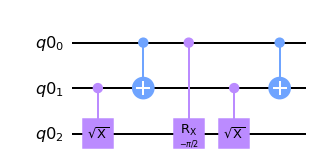

In [4]:
qbsc.draw("mpl")

In [5]:
qbsc_c = qbsc.to_gate(label = "QBSC")

In [6]:
num_qubits = 3

In [7]:
q1 = QuantumRegister(num_qubits)
c1 = ClassicalRegister(num_qubits)
qc1 = QuantumCircuit(q1,c1)

In [8]:
# setuo the initial conditions
qc1.x(q1[1])
qc1.barrier()

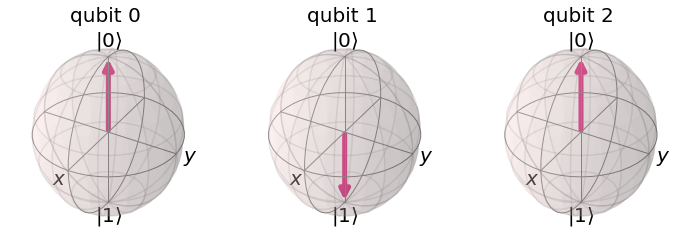

In [9]:
plot_bloch_multivector(execute(qc1,backend).result().get_statevector())

In [10]:
qc1.append(qbsc_c,[q1[0],q1[1],q1[2]])

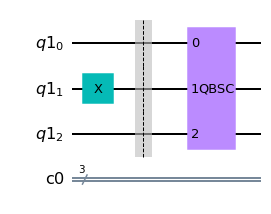

In [11]:
qc1.draw("mpl")

In [12]:
for i in range(num_qubits):
  qc1.measure(q1[i],c1[i])

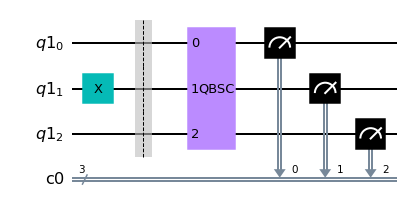

In [13]:
qc1.draw("mpl")

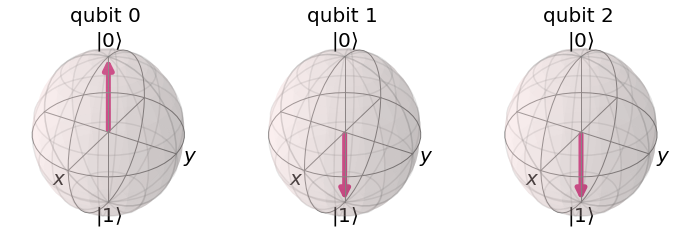

In [14]:
plot_bloch_multivector(execute(qc1,backend).result().get_statevector())

In [15]:
num_experiments = 1024

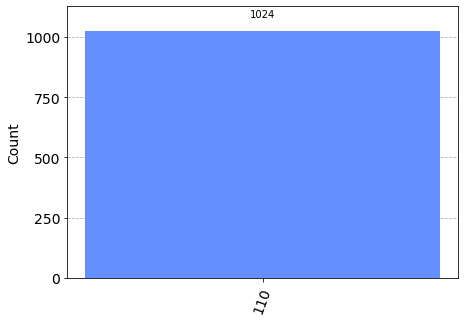

In [16]:
# make a lot of experiments
qc_compiled = transpile(qc1,backend)
job = backend.run(qc_compiled,shots = num_experiments)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# Midpoint Qubit Comparison Circuit

In [17]:
mqcc_qr = QuantumRegister(4)
mqcc_qc = QuantumCircuit(mqcc_qr)

# loss than / greater than
mqcc_qc.cx(mqcc_qr[0],mqcc_qr[2])
mqcc_qc.crx(-math.pi/2,mqcc_qr[2],mqcc_qr[3])
mqcc_qc.cx(mqcc_qr[1],mqcc_qr[2])
mqcc_qc.csx(mqcc_qr[1],mqcc_qr[3])
mqcc_qc.csx(mqcc_qr[2],mqcc_qr[3])
mqcc_qc.cx(mqcc_qr[3],mqcc_qr[2])

# equal
mqcc_qc.x(mqcc_qr[0])
mqcc_qc.cx(mqcc_qr[0],mqcc_qr[1])


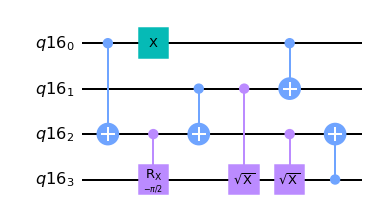

In [18]:
mqcc_qc.draw("mpl")

In [19]:
mqcc_c = mqcc_qc.to_gate()

In [20]:
num_qubits = 4

In [21]:
q2 = QuantumRegister(num_qubits)
c2 = ClassicalRegister(num_qubits)
qc2 = QuantumCircuit(q2,c2)

In [22]:
# initial conditions
qc2.x(q2[0])
#qc2.x(q2[1])
qc2.barrier()

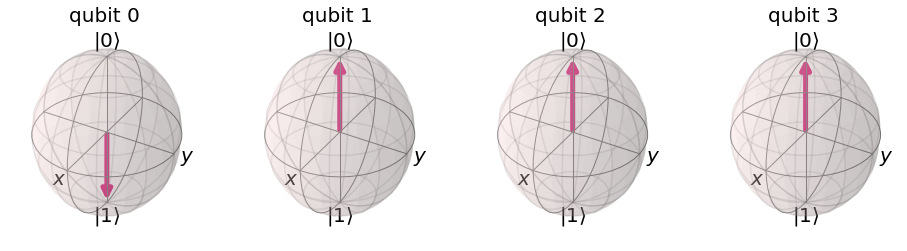

In [23]:
plot_bloch_multivector(execute(qc2,backend).result().get_statevector())

In [24]:
# apply the mqcc
qc2.append(mqcc_c,[q2[0],q2[1],q2[2],q2[3]]) 
qc2.barrier()

In [25]:
# measurement 
for i in range(2,4):
  qc2.measure(q2[i],c2[i])

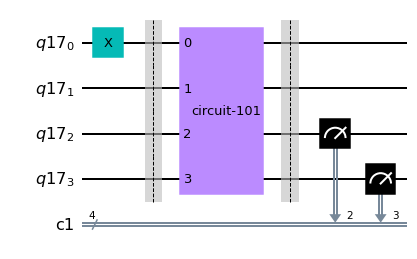

In [26]:
qc2.draw("mpl")

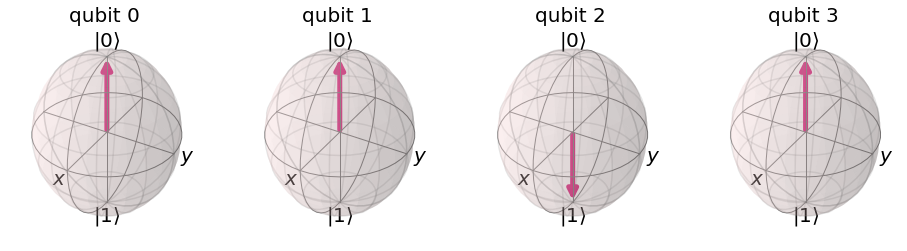

In [27]:
plot_bloch_multivector(execute(qc2,backend).result().get_statevector())

In [28]:
num_experiments = 1024

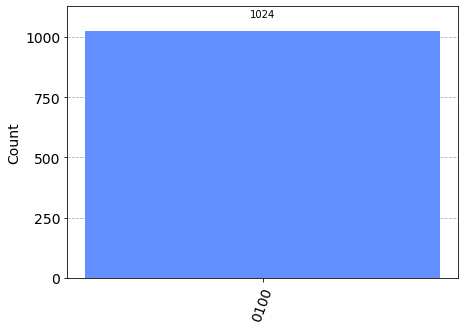

In [29]:
# make a lot of experiments
qc_compiled = transpile(qc2,backend)
job = backend.run(qc_compiled,shots = num_experiments)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)